### Hypothesis testing
Elements of Data Science

## Hypothesis Testing Learning Goals
Develop and test an hypothesis
- Hypothesis
    - testable hypothesis
    - statistic
- Simulation: Sample the distribution
    - Repeat and collect outcomes
    - Iteration: 
        `for i in np.arange(samples)`
- Examine resulting distribution of outcomes
    - Probability distribution
    - Uncertainty
- p-test

In [1]:
import numpy as np
from datascience import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Functions and dice simulation

Simulate rolls of a six-sided die

In [ ]:
possible_rolls = np.arange(1,7)
possible_rolls

In [ ]:
def sim_roll(mod,num):
    '''Simulate six-sided die rolls'''
    rolls = np.random.choice(possible_rolls, num) + mod
    return rolls

In [ ]:
sim_roll(0,10)

In [ ]:
plt.hist(sim_roll(0,100),bins=np.arange(0,10));

In [ ]:
plt.hist(sim_roll(2,100),bins=np.arange(0,10))

In [ ]:
np.mean(sim_roll(0,1000))

In [ ]:
np.mean(np.arange(1,7))

### Python Dictionary Example
A Python dictionary is another important sequence data type in Python

In [ ]:
car = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

x = car.get("model")

print(x)

In [ ]:
car['mpg']=car.get('mpg',0)+1

In [ ]:
car

In [ ]:
darwin_string = open('data/darwin_origin_species.txt', encoding='utf-8').read()
darwin_words = np.array(darwin_string.split())
darwin_words

In [ ]:
darwin_dictionary = {}
for word in darwin_words:
    word = word.lower()
    darwin_dictionary[word] = darwin_dictionary.get(word,0)+1

In [ ]:
darwin_dictionary['birds']

## Hypothesis Testing

#### Ground Hog


In [5]:
groundhogdata = Table.read_table('../Lab05/GroundHogData/summarizedGroundhogData_20210326.csv')
groundhogdata

hogID,year,shadowPres,dateSample,julDay,GDD,cGDD,numObs,meanJulSpringDay,sdJulSpringDay,seJulSpringDay,earlyOrLate
BC,2018,yes,2018-04-11,101,3.05556,127.222,30,85.8667,12.4367,2.27062,late
BC,2019,no,2019-04-06,96,8.33333,123.889,30,85.8667,12.4367,2.27062,late
BECK,2006,yes,2006-02-15,46,7.22222,127.006,30,72.4333,14.6586,2.67628,early
BECK,2007,no,2007-03-14,73,14.1667,129.167,30,72.4333,14.6586,2.67628,late
BECK,2008,no,2008-03-17,77,0.833333,128.611,30,72.4333,14.6586,2.67628,late
BECK,2009,yes,2009-03-10,69,12.2222,130,30,72.4333,14.6586,2.67628,early
BECK,2010,no,2010-03-21,80,7.22222,129.444,30,72.4333,14.6586,2.67628,late
BECK,2011,no,2011-03-20,79,7.77778,133.611,30,72.4333,14.6586,2.67628,late
BECK,2012,no,2012-03-07,67,13.3333,129.444,30,72.4333,14.6586,2.67628,early
BECK,2013,no,2013-03-30,89,3.88889,128.611,30,72.4333,14.6586,2.67628,late


In [6]:
yes_late = groundhogdata.where('shadowPres', 'yes').where('earlyOrLate', 'late')
no_early = groundhogdata.where('shadowPres', 'no').where('earlyOrLate', 'early')

correct_tbl = yes_late.append(no_early)

In [7]:
num_correct = correct_tbl.num_rows / groundhogdata.num_rows * 100
num_correct


51.132075471698116

In [8]:
shadow_options = make_array('yes', 'no')
spring_options = make_array('late', 'early')
num_observations = groundhogdata.num_rows

In [9]:
right = 0 
wrong = 0

for obs in range(num_observations):
    shadow = np.random.choice(shadow_options)
    spring = np.random.choice(spring_options)
    
    if shadow == 'yes' and spring == 'late':
        right += 1
    elif shadow == 'no' and spring == 'early':
        right += 1
    else:
        wrong += 1

simulated_num_correct = right / num_observations
simulated_num_correct

0.5226415094339623

In [10]:
def sim_ground(repeats):
    correct_obs = []
    for i in np.arange(repeats):
        right = 0 
        wrong = 0
        for obs in range(num_observations):
            shadow = np.random.choice(shadow_options)
            spring = np.random.choice(spring_options)
            if shadow == 'yes' and spring == 'late':
                right += 1
            elif shadow == 'no' and spring == 'early':
                right += 1
            else:
                wrong += 1
        simulated_num_correct = right / num_observations
        correct_obs.append(simulated_num_correct)
    return correct_obs        

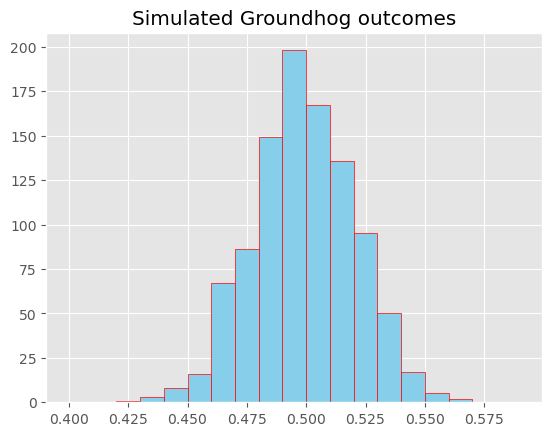

In [13]:

plt.hist(sim_ground(1000),bins=np.arange(0.4,0.6,.01),color = "skyblue", ec="red")
plt.title('Simulated Groundhog outcomes')
plt.savefig('sim_ground.png')
plt.show()

51.132075471698116


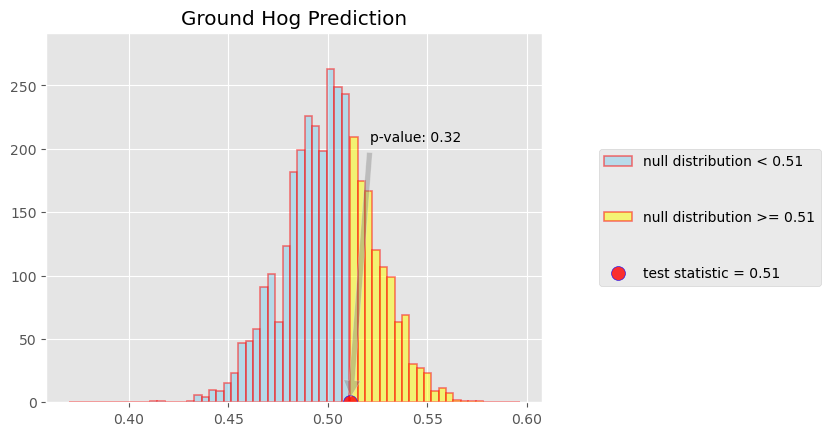

In [73]:
print(num_correct)
num_repeats = 3500
sample = np.array(sim_ground(num_repeats))
sample1 = sample[sample < num_correct/100]
sample2 = sample[sample >= num_correct/100]
plt.ylim((0,num_repeats/12))
plt.hist(sample1, label='null distribution < '+str(round(num_correct/100,2)), bins = np.arange(0.37,num_correct/100,.0037),color='skyblue',alpha=0.5, edgecolor='red', linewidth=1.2)
plt.ylim((0,num_repeats/12))
plt.hist(sample2, label='null distribution >= '+str(round(num_correct/100,2)), bins = np.arange(num_correct/100,.6,.0037),color='yellow',alpha=0.5, edgecolor='red', linewidth=1.2)
plt.scatter(num_correct/100,0, s=100, label='test statistic = '+str(round(num_correct/100,2)),marker='o', 
            c='red',alpha=0.8, edgecolors='blue')
pval=np.count_nonzero(np.array(sample) >= num_correct/100)/len(sample)
plt.annotate(f'p-value: {pval:.2f}',xy =(num_correct/100, 0), 
                xytext =(num_correct/100+.01, num_repeats/17),  
                arrowprops = dict(facecolor ='grey', 
                                  shrink = 0.02, alpha=0.4),)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.title('Ground Hog Prediction')
plt.savefig('Groundhog_pvalue.png')
plt.show()

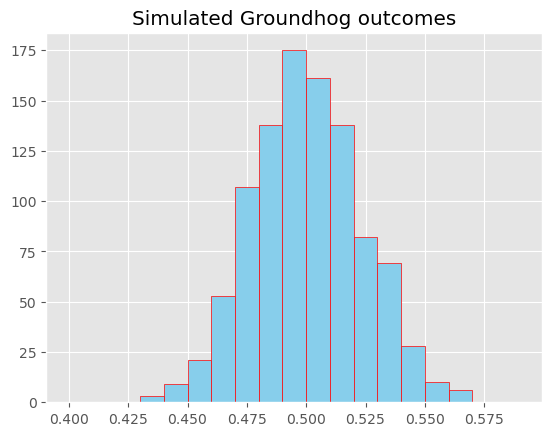

In [41]:

plt.hist(sim_ground(1000),bins=np.arange(0.4,0.6,.01),color = "skyblue", ec="red")
plt.title('Simulated Groundhog outcomes')
plt.savefig('sim_ground.png')
plt.show()

In [ ]:
hogsimdata = Table().with_columns("Correct",sim_ground(1500))
hogsimdata

In [ ]:
hogsimdata.hist(0,bins=np.arange(0.4,0.6,.01))
plt.scatter(num_correct/100, 0, color='red', s=200);
plt.title('Simulated Groundhog outcomes')
plt.savefig('sim_ground_correct.png')
plt.show()

In [ ]:
np.count_nonzero(hogsimdata.column('Correct') >= num_correct/100) / 1500

#### Essex Ed

In [ ]:
groundhogdata.where('hogID',"EE")

In [ ]:
correct_tbl.where('hogID',"EE")

In [ ]:
num_correct = correct_tbl.where('hogID',"EE").num_rows / groundhogdata.where('hogID',"EE").num_rows * 100
num_correct

In [ ]:
hogsimdata.hist(0,bins=np.arange(0.4,0.6,.01))
plt.scatter(num_correct/100, 0, color='red', s=200);
plt.title('Simulated Groundhog outcomes')
plt.savefig('sim_ground_correct.png')
plt.show()

In [ ]:
np.count_nonzero(hogsimdata.column('Correct') >= num_correct/100) / 1500

# Acknowledgement in the Groundhog paper
This study was the result of a truly laboratory-driven effort that started over speculation on a Friday at the campus pub and has led to a cumulative effort of students in the Community Ecology and Energetics Laboratory at Lakehead University over several years. 